# Census Income Project
Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read csv file as df:

In [2]:
df=pd.read_csv("census_income")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Checking the dataset
df.shape

(32560, 15)

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Get the complete info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


from above info the dataset contains 9 object datatype and 6 int datatype

# checking for the null values:

In [7]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

from the above we can say that the given dataset do not have any null value.

In [10]:
#To get the statistical value for all column the following code we are going to run,
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Visualization using the graphs:


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

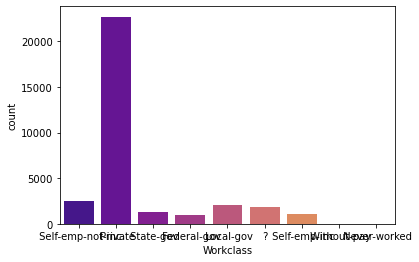

In [12]:
print(df['Workclass'].value_counts())
sns.countplot(x='Workclass',data=df,palette='plasma')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

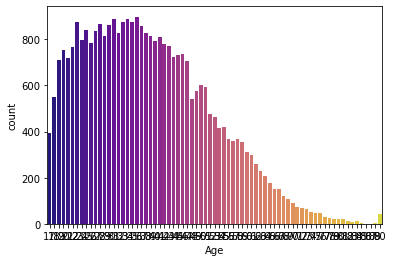

In [13]:
print(df['Age'].value_counts())
sns.countplot(x='Age',data=df,palette='plasma')

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


<AxesSubplot:xlabel='Fnlwgt', ylabel='count'>

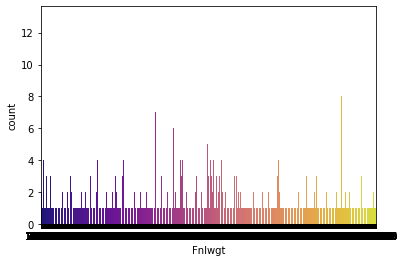

In [14]:
print(df['Fnlwgt'].value_counts())
sns.countplot(x='Fnlwgt',data=df,palette='plasma')

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

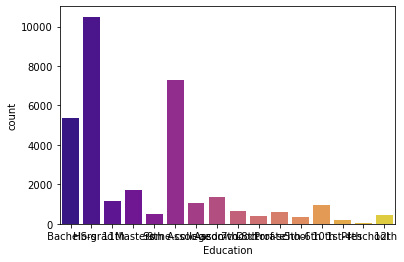

In [15]:
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,palette='plasma')

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


<AxesSubplot:xlabel='Education_num', ylabel='count'>

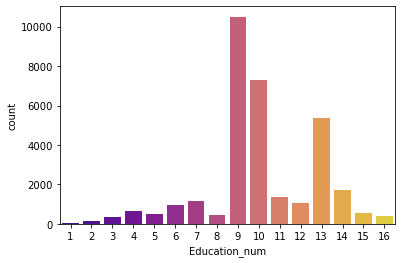

In [16]:
print(df['Education_num'].value_counts())
sns.countplot(x='Education_num',data=df,palette='plasma')

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

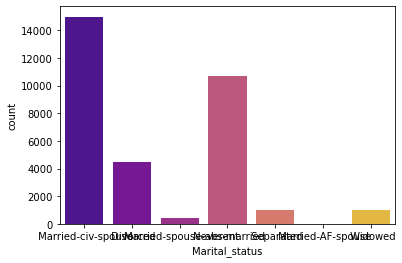

In [17]:
print(df['Marital_status'].value_counts())
sns.countplot(x='Marital_status',data=df,palette='plasma')

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

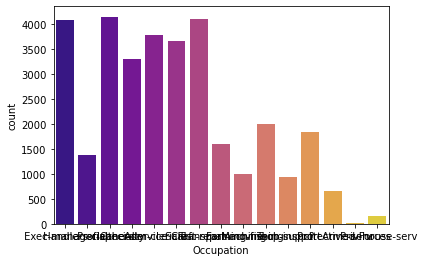

In [18]:
print(df['Occupation'].value_counts())
sns.countplot(x='Occupation',data=df,palette='plasma')

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

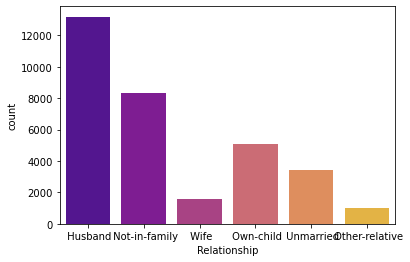

In [19]:
print(df['Relationship'].value_counts())
sns.countplot(x='Relationship',data=df,palette='plasma')

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

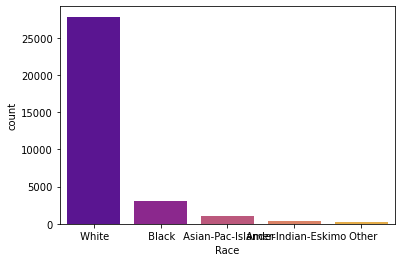

In [20]:
print(df['Race'].value_counts())
sns.countplot(x='Race',data=df,palette='plasma')

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

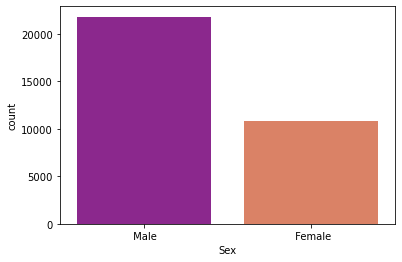

In [21]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df,palette='plasma')

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


<AxesSubplot:xlabel='Capital_gain', ylabel='count'>

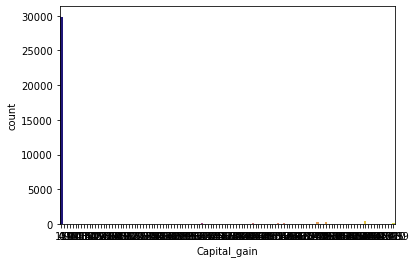

In [22]:
print(df['Capital_gain'].value_counts())
sns.countplot(x='Capital_gain',data=df,palette='plasma')

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


<AxesSubplot:xlabel='Capital_loss', ylabel='count'>

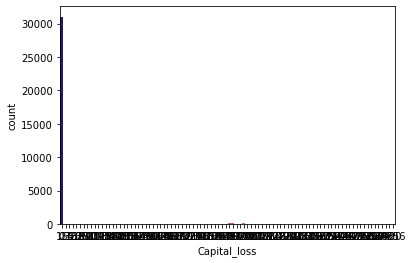

In [23]:
print(df['Capital_loss'].value_counts())
sns.countplot(x='Capital_loss',data=df,palette='plasma')

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

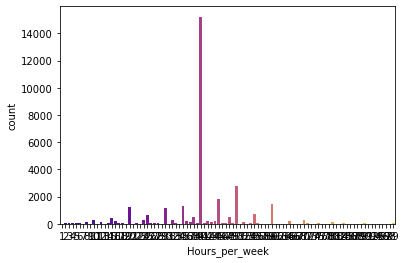

In [24]:
print(df['Hours_per_week'].value_counts())
sns.countplot(x='Hours_per_week',data=df,palette='plasma')

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

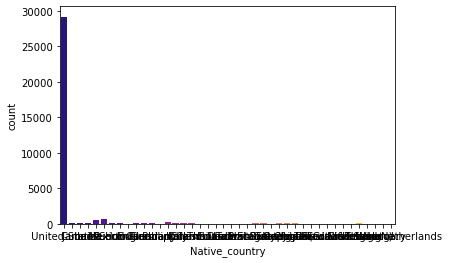

In [25]:
print(df['Native_country'].value_counts())
sns.countplot(x='Native_country',data=df,palette='plasma')

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

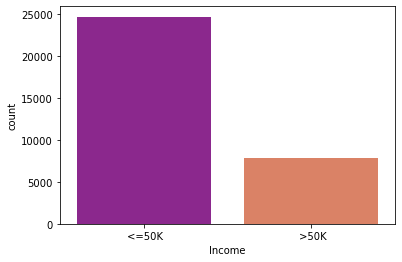

In [26]:
print(df['Income'].value_counts())
sns.countplot(x='Income',data=df,palette='plasma')

In [27]:
#From the above graph we can say that, 
#there are 22696 people are working in the private sector.
#most of the working population falls under the 30-45 age group.
#10501 people have done the HS_grad.
#14976 are married-civ-spouse.
#4140 population are professor.
#13193 are the married men.
#21789 population are male.
# most of the people are white.
#there is huge no of population those works for 40h per week.
# from the given dataset most of the population are from US.
#And 24719 people earns <=50K.

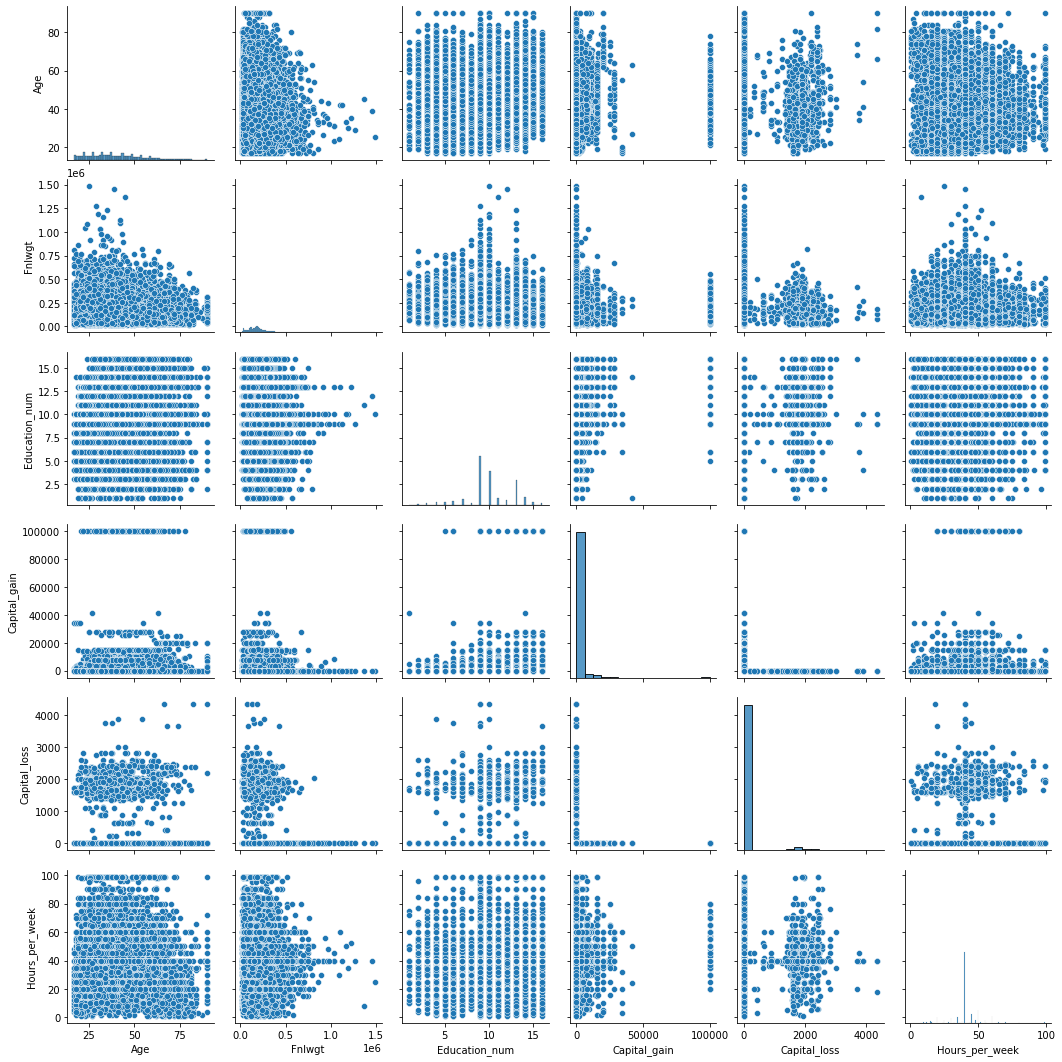

In [28]:
sns.pairplot(df)

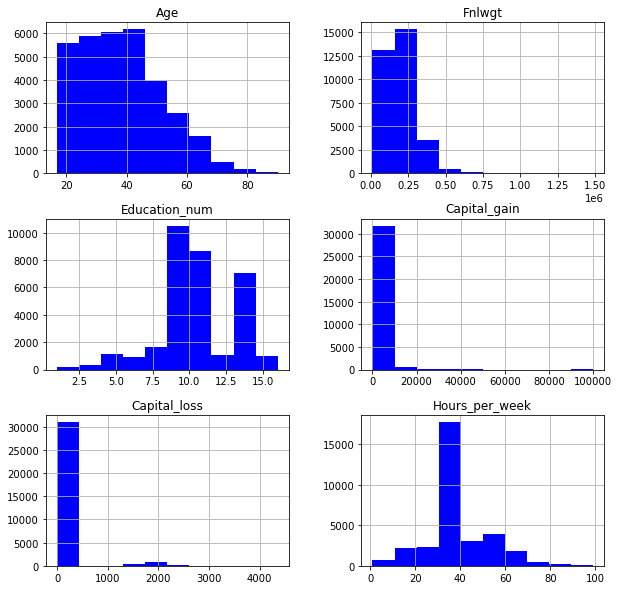

In [29]:
df.hist(figsize=(10,10),color='b')
plt.show()

# checking the correlation:

In [30]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

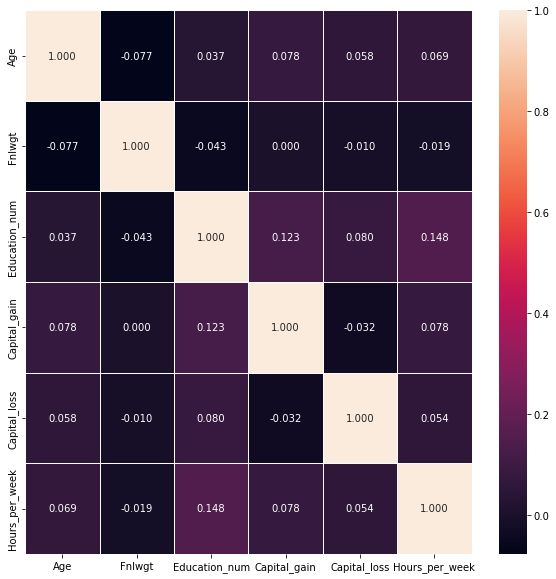

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="white",fmt=".3f")

In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [33]:
df[['Workclass','Occupation','Native_country']]

,Workclass,Occupation,Native_country
0,Self-emp-not-inc,Exec-managerial,United-States
1,Private,Handlers-cleaners,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Prof-specialty,Cuba
4,Private,Exec-managerial,United-States
...,...,...,...
32555,Private,Tech-support,United-States
32556,Private,Machine-op-inspct,United-States
32557,Private,Adm-clerical,United-States
32558,Private,Adm-clerical,United-States


In [34]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
df['Workclass'].mode()

0     Private
dtype: object

In [36]:
df['Workclass'].mode()[0]

' Private'

In [37]:
# replace ? with Nan
df=df.replace(' ?',np.nan)

In [38]:
for i in ['Workclass','Occupation','Native_country']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [39]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [40]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [41]:
num=df.select_dtypes(np.number)
num

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


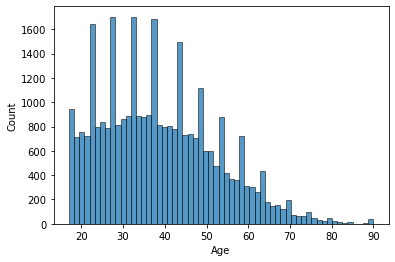

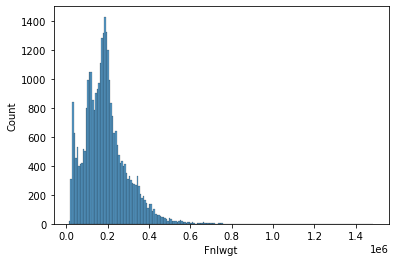

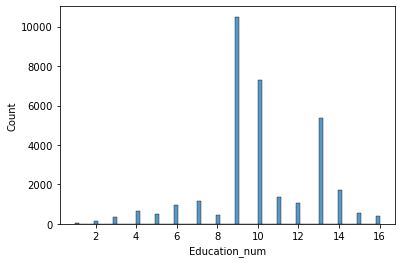

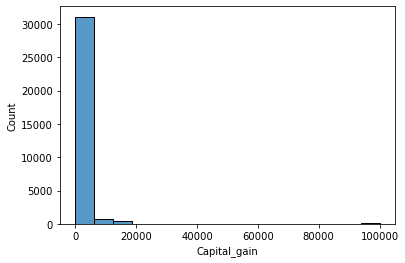

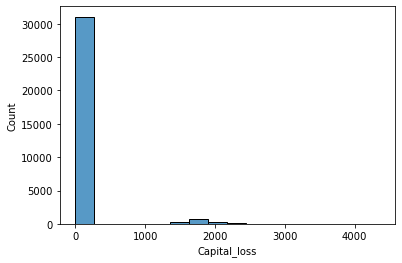

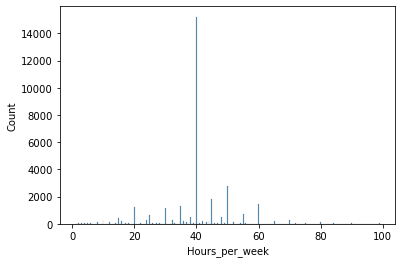

In [42]:
for i in num:
    sns.histplot(df[i])
    plt.show()


# Label Encoding for categorical features


In [43]:
from sklearn.preprocessing import LabelEncoder


In [44]:
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [45]:
for i in df.columns:
    if df[i].dtypes =='object':
        le=LabelEncoder()
        df[i]= le.fit_transform(df[i])

In [46]:
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


<AxesSubplot:>

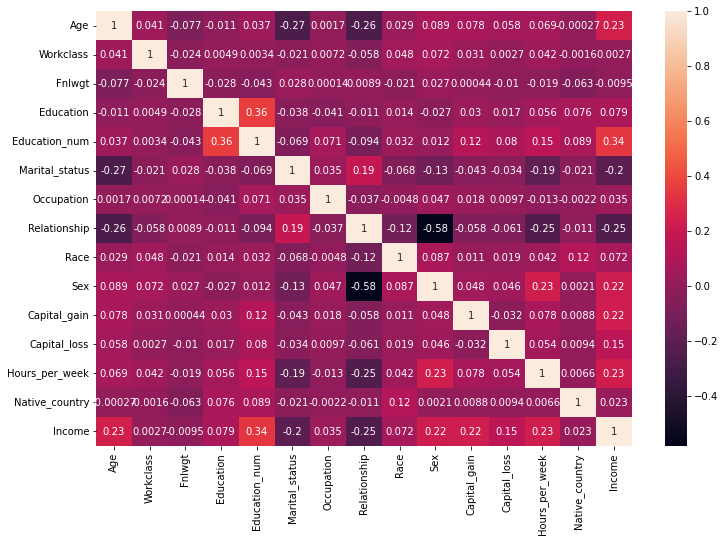

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Correlating with the target variable

# Split x and y features:


In [48]:
X=df.drop('Income', axis=1)
Y=df['Income']

In [49]:
X.shape , Y.shape

((32560, 14), (32560,))

# Extra Tree Classifier for Feature Selection


In [50]:
from sklearn.ensemble import ExtraTreesClassifier
select= ExtraTreesClassifier()
select.fit(X,Y)

ExtraTreesClassifier()

In [51]:
add=select.feature_importances_

In [52]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.15585239744839446
1 0.04191416167468647
2 0.1670360181395328
3 0.03478103330312338
4 0.09014235653762755
5 0.07042137644692731
6 0.07377753298014658
7 0.09101858348021963
8 0.015123986282390891
9 0.030637244762339633
10 0.0895571419091263
11 0.028445419483645304
12 0.0961177595372076
13 0.015174988014632095


In [53]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= X.columns
imp_feature['Values']=select.feature_importances_

In [54]:
imp_feature.sort_values('Values',ascending=False)

,Feature,Values
2,Fnlwgt,0.167036
0,Age,0.155852
12,Hours_per_week,0.096118
7,Relationship,0.091019
4,Education_num,0.090142
10,Capital_gain,0.089557
6,Occupation,0.073778
5,Marital_status,0.070421
1,Workclass,0.041914
3,Education,0.034781


In [55]:
16.7+15.7+9.5+8.8+8.8+8.7+7.6+7.3+4.1+3.7+2.8+2.7

96.39999999999999

In [56]:
X=X.drop(['Native_country','Race'], axis=1)

In [58]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,5,83311,9,13,2,3,0,1,0,0,13
1,38,3,215646,11,9,0,5,1,1,0,0,40
2,53,3,234721,1,7,2,5,0,1,0,0,40
3,28,3,338409,9,13,2,9,5,0,0,0,40
4,37,3,284582,12,14,2,3,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,0,0,0,38
32556,40,3,154374,11,9,2,6,0,1,0,0,40
32557,58,3,151910,11,9,6,0,4,0,0,0,40
32558,22,3,201490,11,9,4,0,3,1,0,0,20


In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
X=sc.fit_transform(X)

In [61]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.837097,1.721336,-1.008742,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,0.703087,-0.145914,-0.216663,-2.222120
1,-0.042640,-0.085223,0.245046,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,0.703087,-0.145914,-0.216663,-0.035430
2,1.057031,-0.085223,0.425770,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,0.703087,-0.145914,-0.216663,-0.035430
3,-0.775755,-0.085223,1.408146,-0.335443,1.134779,-0.406183,0.720204,2.211658,-1.422298,-0.145914,-0.216663,-0.035430
4,-0.115952,-0.085223,0.898170,0.439700,1.523480,-0.406183,-0.790156,2.211658,-1.422298,-0.145914,-0.216663,-0.035430
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,-0.085223,0.639710,-0.852204,0.746077,-0.406183,1.475385,2.211658,-1.422298,-0.145914,-0.216663,-0.197407
32556,0.103982,-0.085223,-0.335466,0.181319,-0.420027,-0.406183,-0.034976,-0.900177,0.703087,-0.145914,-0.216663,-0.035430
32557,1.423589,-0.085223,-0.358811,0.181319,-0.420027,2.249503,-1.545336,1.589291,-1.422298,-0.145914,-0.216663,-0.035430
32558,-1.215624,-0.085223,0.110927,0.181319,-0.420027,0.921660,-1.545336,0.966924,0.703087,-0.145914,-0.216663,-1.655200


In [62]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [63]:
Y.value_counts()*100

0    2471900
1     784100
Name: Income, dtype: int64

In [64]:
Y.value_counts(normalize=True)*100

0    75.918305
1    24.081695
Name: Income, dtype: float64

In [65]:
 balanced_X,balanced_Y=smt.fit_resample(X,Y)

In [66]:
balanced_X.shape  , balanced_Y.shape

((49438, 12), (49438,))

In [67]:
balanced_Y.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Income, dtype: float64

# Train-Test Splitting

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [69]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(balanced_X,balanced_Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.781957928802589 on Random State = 186


In [70]:
x_train,x_test,y_train,y_test= train_test_split(balanced_X,balanced_Y,random_state=23,test_size=.3)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [72]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [73]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.52831715210357
F1 SCore                 77.42022898177629
Confusion Matrix of  LogisticRegression()  is 
 [[5785 1667]
 [1666 5714]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7452
           1       0.77      0.77      0.77      7380

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832

**************************************************
Accuracy_Score of  RidgeClassifier() is 75.88322545846817
F1 SCore                 76.29713074017626
Confusion Matrix of  RidgeClassifier()  is 
 [[5498 1954]
 [1623 5757]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      7452
           1       0.75      0.78      0.76      7380

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     1483

# Cross Validation


In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,balanced_X,balanced_Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.52831715210357
cross Validation accuracy score of  LogisticRegression()  is  77.10669194584894
**************************************************
Accuracy_Score of  RidgeClassifier() is 75.88322545846817
cross Validation accuracy score of  RidgeClassifier()  is  75.80001058891035
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 85.30879180151025
cross Validation accuracy score of  DecisionTreeClassifier()  is  85.14717930740343
**************************************************
Accuracy_Score of  SVC() is 82.59843581445523
cross Validation accuracy score of  SVC()  is  83.19108494761028
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 85.26833872707658
cross Validation accuracy score of  KNeighborsClassifier()  is  86.1200262398763
**************************************************
Accuracy_Score of  RandomForestClassifier() is 89.35409924487594


# Hypertuning


In [76]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [77]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random= RandomizedSearchCV(RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [78]:
random.best_estimator_

RandomForestClassifier(max_depth=227, min_samples_split=3, n_estimators=1000)

In [79]:
random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 227}

In [80]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 86.13
F1 score: 86.44


<AxesSubplot:>

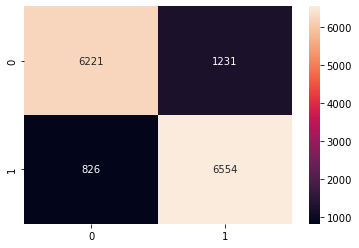

In [81]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7452
           1       0.84      0.89      0.86      7380

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [83]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

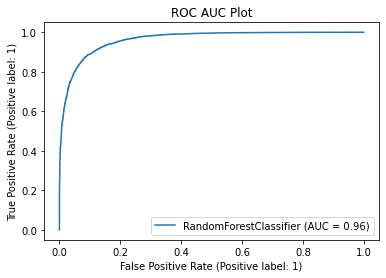

In [84]:
plot_roc_curve(random.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving the model:

In [85]:
import joblib
joblib.dump(random.best_estimator_,'Income_Prediction.pkl')


['Income_Prediction.pkl']

# The end